# importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [36]:
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df=pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# insights about data

In [37]:
df.head() # print first 5 things

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.shape # no of rows and columns

(1338, 7)

In [40]:
df.info() # information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
df.isnull().sum() #to check if any null value there or not

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
df.columns #to check the names of columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [43]:
df.describe() #to get mathematical description of data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

# to check distribution of gender

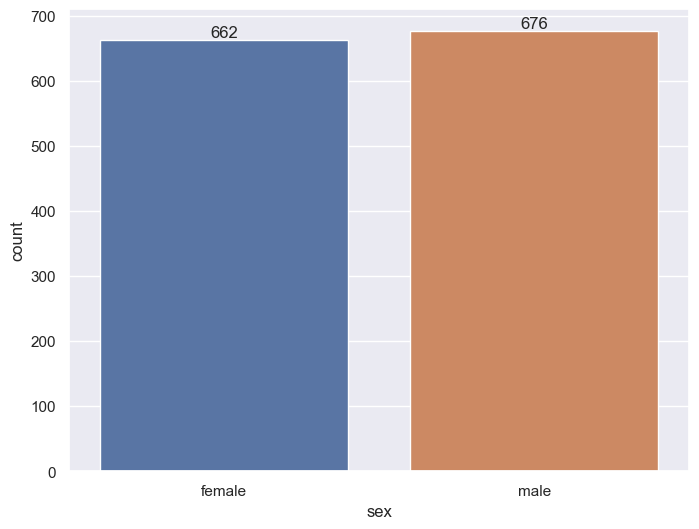

In [50]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
a=sns.countplot(x="sex",data=df)
for ax in a.containers:
    a.bar_label(ax)

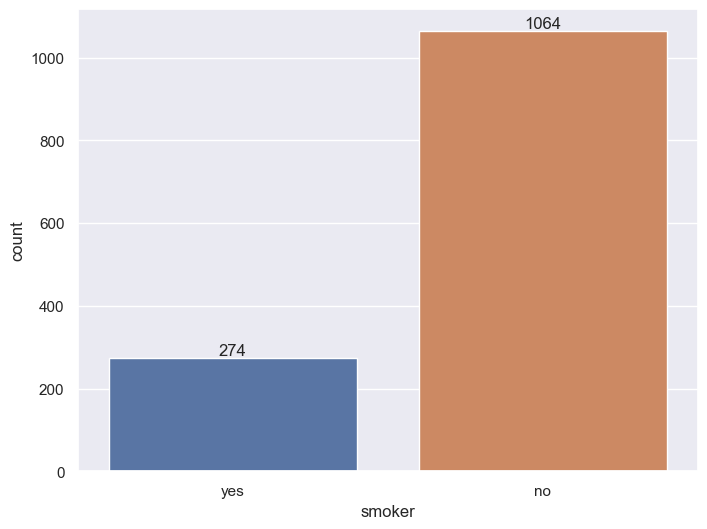

In [51]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
a=sns.countplot(x="smoker",data=df)
for ax in a.containers:
    a.bar_label(ax)

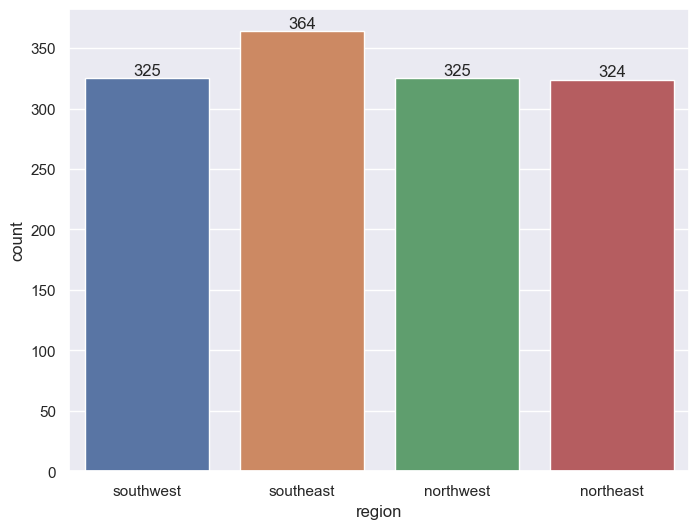

In [52]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
a=sns.countplot(x="region",data=df)
for ax in a.containers:
    a.bar_label(ax)

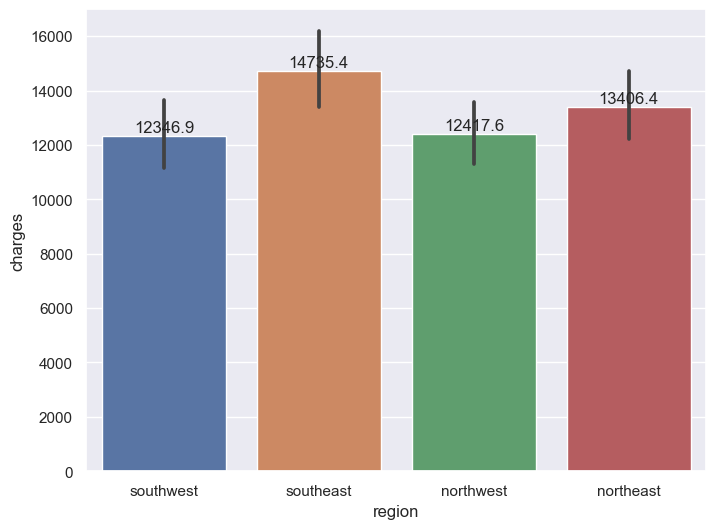

In [54]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6))
a=sns.barplot(x="region",y="charges",data=df)
for ax in a.containers:
    a.bar_label(ax)

Text(0.5, 1.0, 'Charges for smokers')

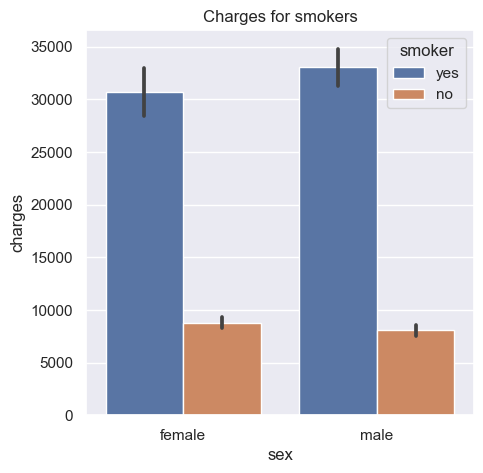

In [55]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

Text(0.5, 1.0, 'Age group :')

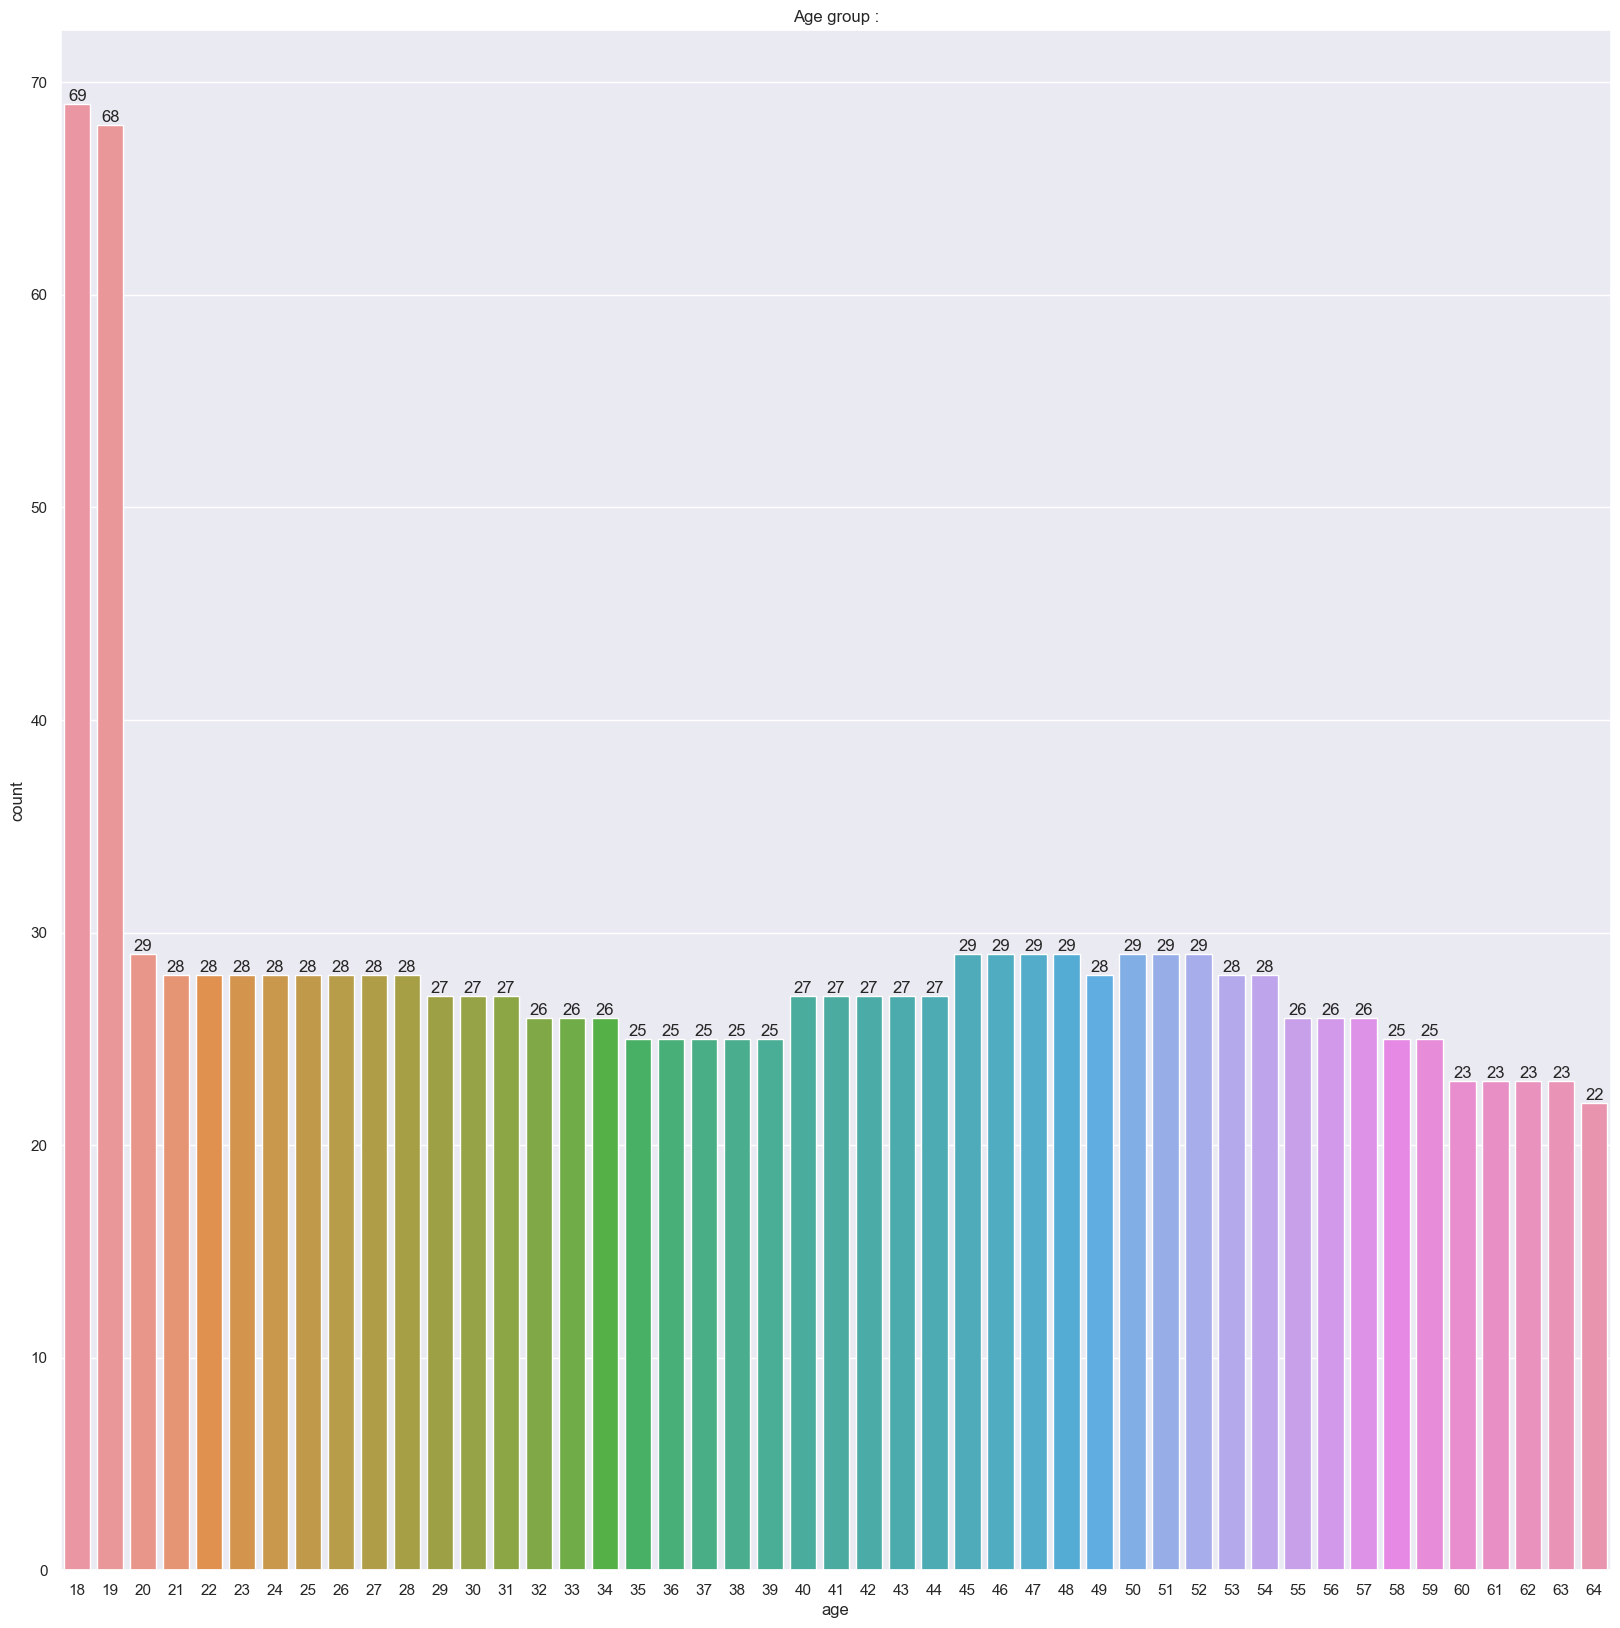

In [86]:
plt.figure(figsize=(20,20))
a=sns.countplot(x='age',data=df)
for ax in a.containers:
    a.bar_label(ax)
plt.title("Age group :")

In [56]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


<AxesSubplot:>

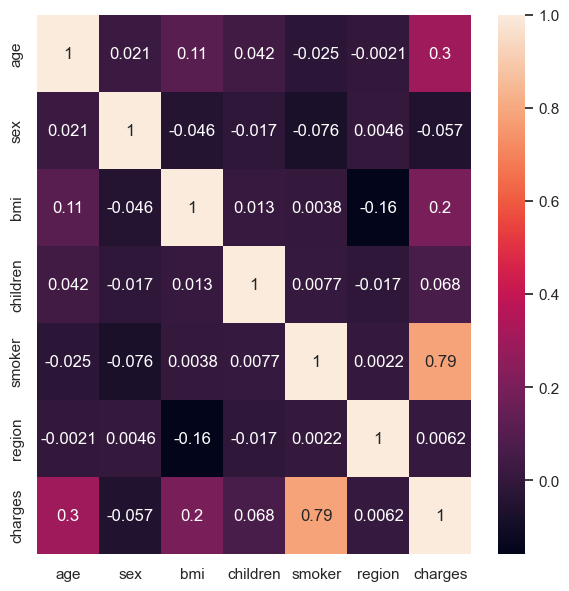

In [97]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

In [ ]:
 conclusions
    
1) age is independant of charges .
2) age and smoker are inversely propotional , it means that as the age passes the number of people who smoked are less 
this means youngsters are consuming more cigaretts compared to oldage people .

# machine learning model linear regression model


In [61]:
X=df.drop(['charges','sex'],axis=1)
y=df.charges

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [64]:
X_train

,age,bmi,children,smoker,region
1063,36,28.595,3,0,3
896,43,20.045,2,1,4
131,61,22.040,0,0,4
764,45,25.175,2,0,4
980,54,25.460,1,0,4
...,...,...,...,...,...
505,37,30.875,3,0,3
778,35,34.320,3,0,2
4,32,28.880,0,0,3
31,18,26.315,0,0,4


In [65]:
X_test

,age,bmi,children,smoker,region
1019,21,32.680,2,0,3
1109,45,20.350,3,0,2
1084,62,30.495,2,0,3
1010,48,22.800,0,0,1
183,44,26.410,0,0,3
...,...,...,...,...,...
1152,43,32.560,3,1,2
1283,18,30.030,1,0,2
788,29,22.515,3,0,4
573,62,36.860,1,0,4


In [66]:
y_train

1063     6548.19505
896     19798.05455
131     13616.35860
764      9095.06825
980     25517.11363
           ...     
505      6796.86325
778      5934.37980
4        3866.85520
31       2198.18985
365      9778.34720
Name: charges, Length: 1070, dtype: float64

In [67]:
y_test

1019    26018.95052
1109     8605.36150
1084    15019.76005
1010     8269.04400
183      7419.47790
           ...     
1152    40941.28540
1283     1720.35370
788      5209.57885
573     31620.00106
412     14455.64405
Name: charges, Length: 268, dtype: float64

In [69]:
print("x train shape",X_train.shape)
print("x test shape",X_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

x train shape (1070, 5)
x test shape (268, 5)
y train shape (1070,)
y test shape (268,)


In [70]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)

In [71]:
pred

array([ 4838.45250262,  7191.99074753, 14842.35641403,  7202.52740423,
        7935.87757988, 27014.09293514,  5760.44215673, 13311.70585335,
       35014.35132033,  6119.74945174, 14435.69414879, 10394.28233098,
        8470.96828153, 39829.5645289 , 14453.16868036,  3334.36845141,
       16108.49669215, 39131.02625357,  7696.33768881, 16734.0069167 ,
        5656.24926022,  1120.01927159, 13972.5205686 ,  8898.8844761 ,
       17497.11244933, 31805.4358914 ,  5962.33815835, 32087.9041998 ,
        4743.58567922,  9036.11824597,  4743.75268573,  8456.49391292,
       25977.01584194, 34792.09481794,  7452.73447744, 13501.40862899,
        6743.19161814,  5070.55479028,  3224.29785193, 14538.94352588,
        5021.73243572,  8265.23565313,   -96.12130085, 13756.17330726,
       10044.33068923,  3984.22738251, 10930.13670007, 11475.16739749,
       12783.82851994, 14927.51189311,  6932.53013368,  5357.33376305,
        2374.4742179 , 12898.49513719,  4768.37180244, 13446.03639264,
      

In [72]:
#to check accuracy of the model

In [74]:
from sklearn.metrics import r2_score

In [75]:
print("r2 score :",(r2_score(y_test,pred)))

r2 score : 0.741258277261752


Text(0, 0.5, 'pred')

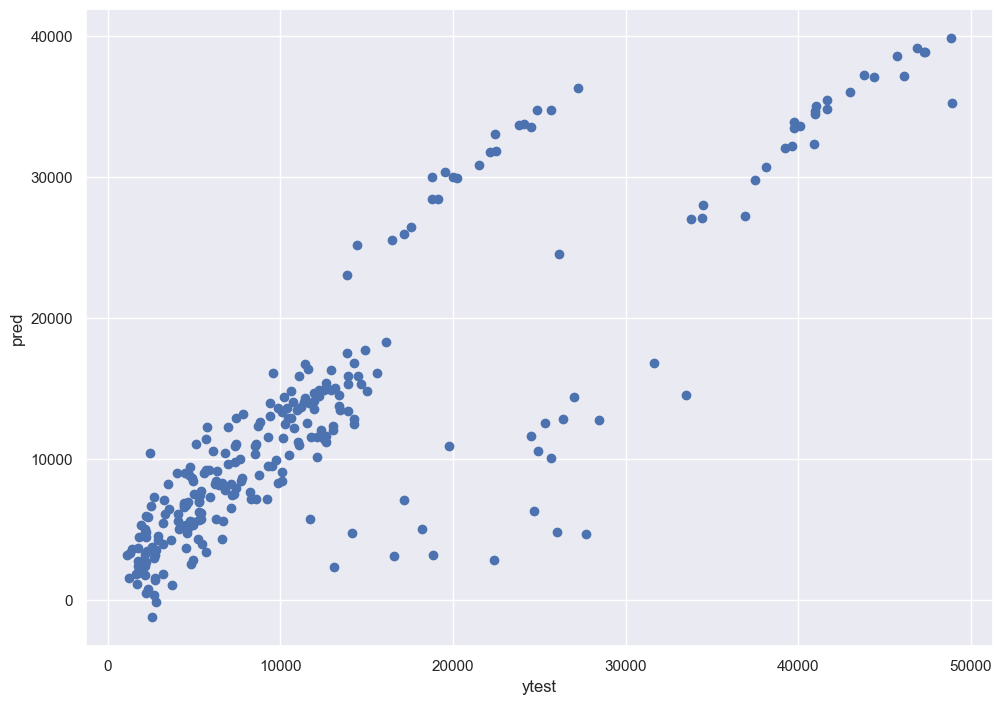

In [77]:
plt.scatter(y_test,pred)

plt.xlabel("ytest")
plt.ylabel("pred")

In [78]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [79]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33405.22764574]


In [80]:
data1={'age':75,'bmi':30,'children':3,'smoker':0,'region':1}
index=[1]
customerdf=pd.DataFrame(data1,index)
customerdf

,age,bmi,children,smoker,region
1,75,30,3,0,1


In [82]:
cost_prediction=linreg.predict(customerdf)
print("medical insurance cost of new custoemr is :",cost_prediction)

medical insurance cost of new custoemr is : [17914.9374725]


# Problem Statement

Here dataset has been provided which consists of the columns called age , sex , bmi , children , smoker ,
region and based upon these data you have to predict the insurance cost of the customer .

# Approach to solve

# CONCLUSION